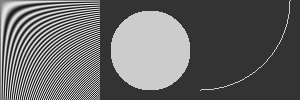

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, convolve2d

import PIL.Image
from io import BytesIO
import IPython.display

S = 100
def freqs(i, j):
    t = i / S
    f = j / 2.0
    v = np.sin(t * f * 2 * np.pi)
    return v * 0.4 + 0.5

def circle(i, j):
    dist = np.sqrt((i - S / 2) ** 2 + (j - S / 2) ** 2)
    return np.clip((dist < S * 0.4).astype(float), 0.2, 0.8)

def curve(i, j):
    W  = S * 0.9
    x = i / W
    y = j / W
    # x**2 + y ** 2 = 1 => y = sqrt(1 - x**2) or x = sqrt(1 - y**2)
    if i < j:
        if 1 - x**2 < 0.0:
            v = 0.0
        else:
            v =  float(j == int(np.sqrt(1 - x**2)*W))
    else:
        if 1 - y**2 < 0.0:
            v = 0.0
        else:
            v =  float(i == int(np.sqrt(1 - y**2)*W))  
    return np.clip(v, 0.2, 0.8)

def show_image(a):
    a = np.uint8(np.clip(a*255.0, 0., 255.))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

freq_image = np.fromfunction(freqs, (S,S), dtype=float)
circle_image = np.fromfunction(circle, (S,S), dtype=float)
curve_image = np.fromfunction(np.vectorize(curve), (S,S), dtype=float)

image = np.concatenate((freq_image, circle_image, curve_image), axis=1)

show_image(image)

def freq_response_window(window, cutoff):
    # Normalize window
    window = window * (1/sum(window))

    # Plot window
    x = np.arange(0,len(window), 1)
    fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12,3))

    ax1.plot(x, window)
    ax1.set_ylim(min(min(window), 0), max(window)+0.1)

    # Plot Frequency response
    w, h = freqz(window)

    m = np.abs(h)
    m_db = 20 * np.log10(m)

    ax2.plot(w, m_db)

    # Stack plot of aliased frequencies
    N = len(w) // cutoff

    layers = []
    remain = m

    while len(remain) > 0:
        layer = remain[:N].copy()
        layer.resize(N, refcheck=False)
        if len(layers) % 2 == 1:
            layer = np.flip(layer)
        
        layers.append(layer)
        remain = remain[N:]

    y = np.vstack(layers)
    ax3.stackplot(w[:N], y)

    plt.show()

    # Apply filter to image
    window = window[:, np.newaxis] # 2d kernel
    window = window @ window.T # square kernel
    window = window * (1.0/np.sum(window)) # renormalize
    print(window)
    image_response = convolve2d(image, window,mode='same')
    show_image(image_response)
    show_image(image_response[::cutoff, ::cutoff]) # downsampled

Box filter 2x


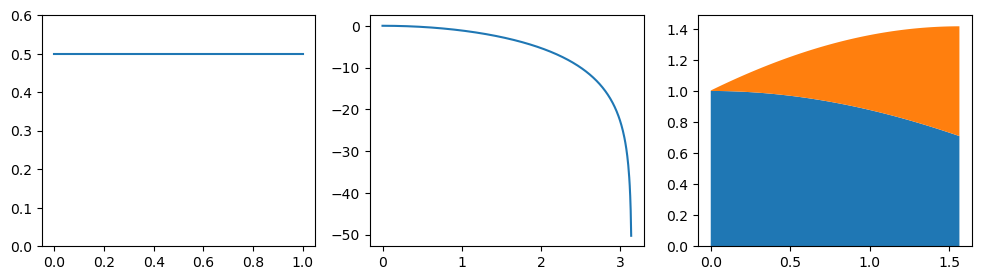

[[0.25 0.25]
 [0.25 0.25]]


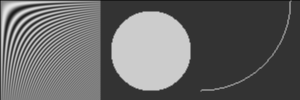

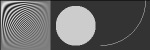

Box filter 3x


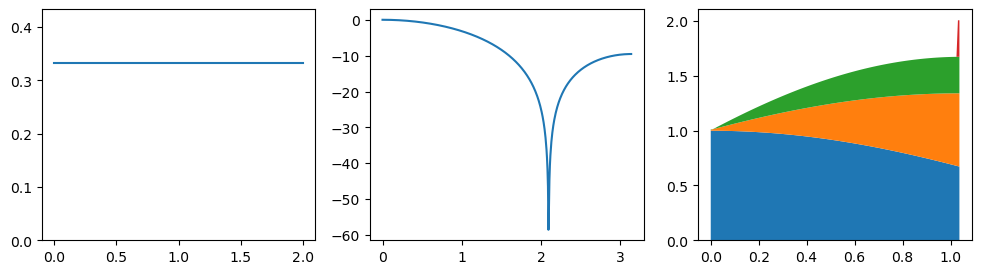

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


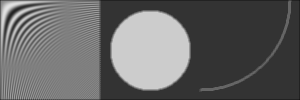

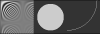

Lanczos 1x
3


/tmp/ipykernel_14327/1925481259.py:11: RuntimeWarning: invalid value encountered in divide
  k = a * np.sin(x * np.pi) * np.sin(x * np.pi / a) / (x**2 * np.pi ** 2)


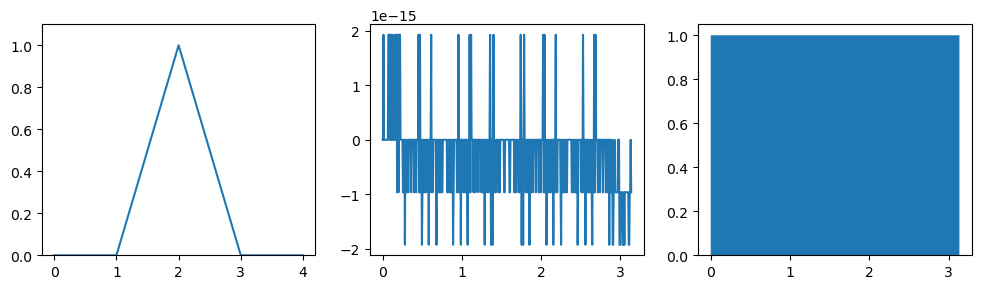

[[ 2.59816061e-34 -5.19632122e-34 -1.61188108e-17 -5.19632122e-34
   2.59816061e-34]
 [-5.19632122e-34  1.03926424e-33  3.22376216e-17  1.03926424e-33
  -5.19632122e-34]
 [-1.61188108e-17  3.22376216e-17  1.00000000e+00  3.22376216e-17
  -1.61188108e-17]
 [-5.19632122e-34  1.03926424e-33  3.22376216e-17  1.03926424e-33
  -5.19632122e-34]
 [ 2.59816061e-34 -5.19632122e-34 -1.61188108e-17 -5.19632122e-34
   2.59816061e-34]]


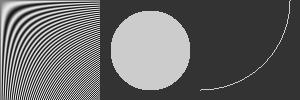

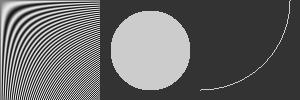

Lanczos 2x
1


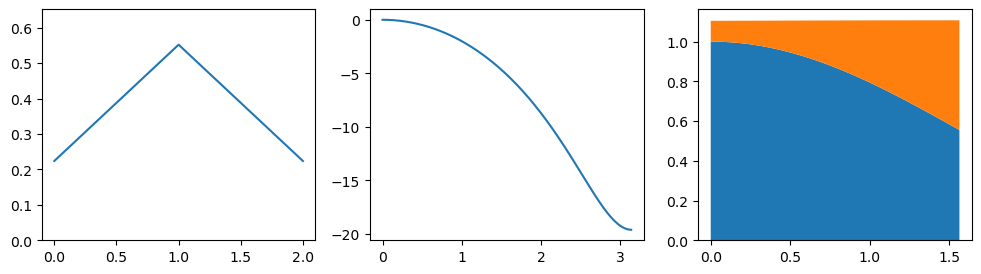

[[0.05010604 0.12363171 0.05010604]
 [0.12363171 0.30504901 0.12363171]
 [0.05010604 0.12363171 0.05010604]]


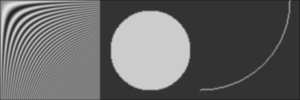

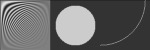

2


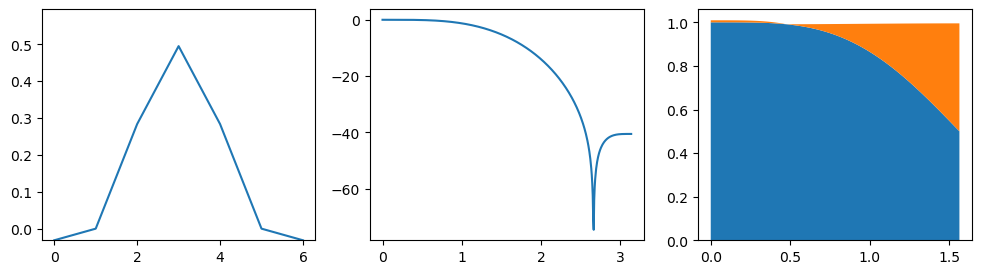

[[ 9.94980340e-04 -3.87724163e-19 -8.95482306e-03 -1.56236235e-02
  -8.95482306e-03 -3.87724163e-19  9.94980340e-04]
 [-3.87724163e-19  1.51088439e-34  3.48951747e-18  6.08821713e-18
   3.48951747e-18  1.51088439e-34 -3.87724163e-19]
 [-8.95482306e-03  3.48951747e-18  8.05934075e-02  1.40612612e-01
   8.05934075e-02  3.48951747e-18 -8.95482306e-03]
 [-1.56236235e-02  6.08821713e-18  1.40612612e-01  2.45329080e-01
   1.40612612e-01  6.08821713e-18 -1.56236235e-02]
 [-8.95482306e-03  3.48951747e-18  8.05934075e-02  1.40612612e-01
   8.05934075e-02  3.48951747e-18 -8.95482306e-03]
 [-3.87724163e-19  1.51088439e-34  3.48951747e-18  6.08821713e-18
   3.48951747e-18  1.51088439e-34 -3.87724163e-19]
 [ 9.94980340e-04 -3.87724163e-19 -8.95482306e-03 -1.56236235e-02
  -8.95482306e-03 -3.87724163e-19  9.94980340e-04]]


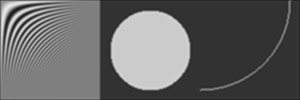

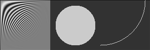

3


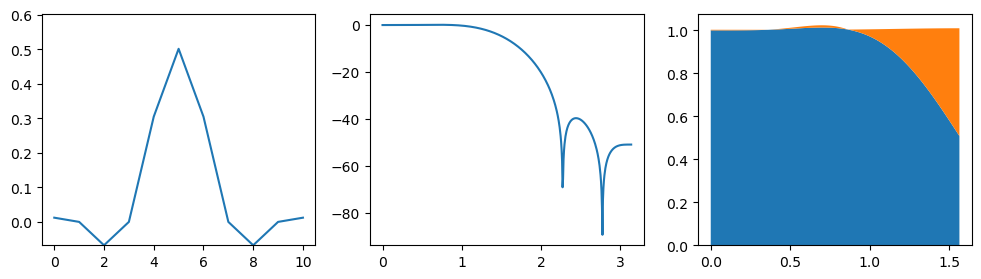

[[ 1.48676609e-04 -9.85517061e-20 -8.25981159e-04  1.97103412e-19
   3.71691522e-03  6.11408046e-03  3.71691522e-03  1.97103412e-19
  -8.25981159e-04 -9.85517061e-20  1.48676609e-04]
 [-9.85517061e-20  6.53259370e-35  5.47509478e-19 -1.30651874e-34
  -2.46379265e-18 -4.05277647e-18 -2.46379265e-18 -1.30651874e-34
   5.47509478e-19  6.53259370e-35 -9.85517061e-20]
 [-8.25981159e-04  5.47509478e-19  4.58878422e-03 -1.09501896e-18
  -2.06495290e-02 -3.39671137e-02 -2.06495290e-02 -1.09501896e-18
   4.58878422e-03  5.47509478e-19 -8.25981159e-04]
 [ 1.97103412e-19 -1.30651874e-34 -1.09501896e-18  2.61303748e-34
   4.92758530e-18  8.10555293e-18  4.92758530e-18  2.61303748e-34
  -1.09501896e-18 -1.30651874e-34  1.97103412e-19]
 [ 3.71691522e-03 -2.46379265e-18 -2.06495290e-02  4.92758530e-18
   9.29228804e-02  1.52852012e-01  9.29228804e-02  4.92758530e-18
  -2.06495290e-02 -2.46379265e-18  3.71691522e-03]
 [ 6.11408046e-03 -4.05277647e-18 -3.39671137e-02  8.10555293e-18
   1.52852012e-01  

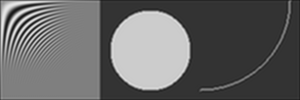

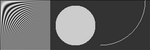

4


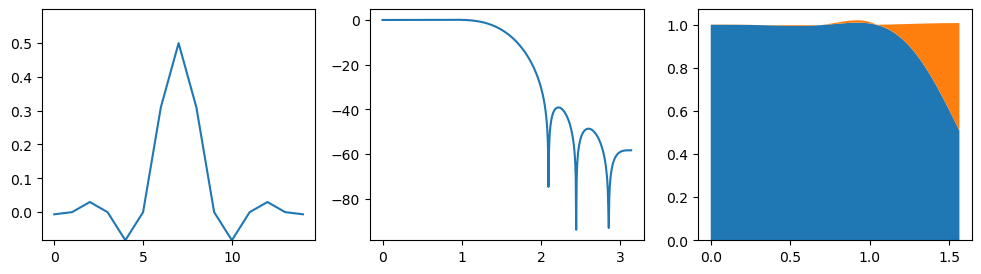

[[ 3.99771423e-05 -3.69387992e-20 -1.89166184e-04  7.83590262e-20
   5.25461622e-04 -1.10816398e-19 -1.95887997e-03 -3.15753322e-03
  -1.95887997e-03 -1.10816398e-19  5.25461622e-04  7.83590262e-20
  -1.89166184e-04 -3.69387992e-20  3.99771423e-05]
 [-3.69387992e-20  3.41313763e-35  1.74789174e-19 -7.24035828e-35
  -4.85525483e-19  1.02394129e-34  1.81000116e-18  2.91755435e-18
   1.81000116e-18  1.02394129e-34 -4.85525483e-19 -7.24035828e-35
   1.74789174e-19  3.41313763e-35 -3.69387992e-20]
 [-1.89166184e-04  1.74789174e-19  8.95107630e-04 -3.70783831e-19
  -2.48641008e-03  5.24367522e-19  9.26914301e-03  1.49410007e-02
   9.26914301e-03  5.24367522e-19 -2.48641008e-03 -3.70783831e-19
   8.95107630e-04  1.74789174e-19 -1.89166184e-04]
 [ 7.83590262e-20 -7.24035828e-35 -3.70783831e-19  1.53591193e-34
   1.02995508e-18 -2.17210748e-34 -3.83959228e-18 -6.18906740e-18
  -3.83959228e-18 -2.17210748e-34  1.02995508e-18  1.53591193e-34
  -3.70783831e-19 -7.24035828e-35  7.83590262e-20]
 [ 5

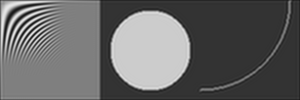

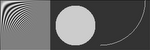

Lanczos 3x
1


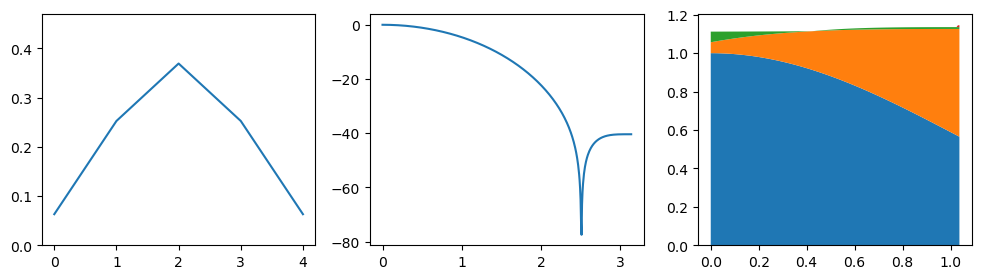

[[0.00398121 0.01592484 0.02328473 0.01592484 0.00398121]
 [0.01592484 0.06369938 0.09313891 0.06369938 0.01592484]
 [0.02328473 0.09313891 0.13618433 0.09313891 0.02328473]
 [0.01592484 0.06369938 0.09313891 0.06369938 0.01592484]
 [0.00398121 0.01592484 0.02328473 0.01592484 0.00398121]]


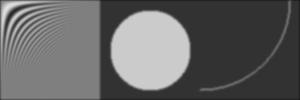

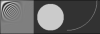

2


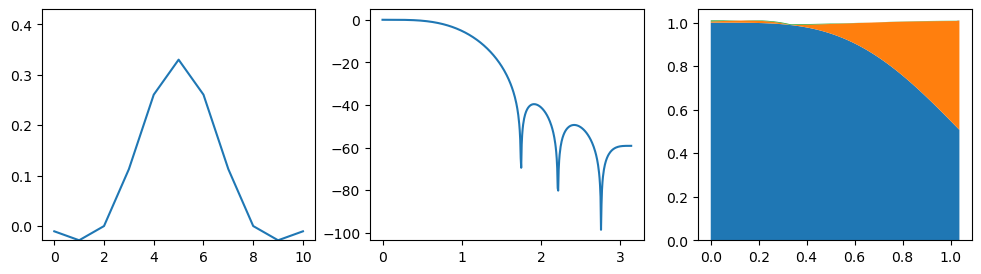

[[ 1.08745267e-04  2.94300511e-04  5.34162832e-19 -1.17720204e-03
  -2.71863167e-03 -3.44252399e-03 -2.71863167e-03 -1.17720204e-03
  -1.63441736e-18  2.94300511e-04  1.08745267e-04]
 [ 2.94300511e-04  7.96474122e-04  1.44562057e-18 -3.18589649e-03
  -7.35751278e-03 -9.31660385e-03 -7.35751278e-03 -3.18589649e-03
  -4.42327174e-18  7.96474122e-04  2.94300511e-04]
 [ 5.34162832e-19  1.44562057e-18  2.62383771e-33 -5.78248228e-18
  -1.33540708e-17 -1.69098704e-17 -1.33540708e-17 -5.78248228e-18
  -8.02834950e-33  1.44562057e-18  5.34162832e-19]
 [-1.17720204e-03 -3.18589649e-03 -5.78248228e-18  1.27435859e-02
   2.94300511e-02  3.72664154e-02  2.94300511e-02  1.27435859e-02
   1.76930870e-17 -3.18589649e-03 -1.17720204e-03]
 [-2.71863167e-03 -7.35751278e-03 -1.33540708e-17  2.94300511e-02
   6.79657917e-02  8.60630998e-02  6.79657917e-02  2.94300511e-02
   4.08604341e-17 -7.35751278e-03 -2.71863167e-03]
 [-3.44252399e-03 -9.31660385e-03 -1.69098704e-17  3.72664154e-02
   8.60630998e-02  

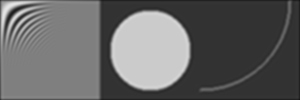

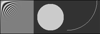

3


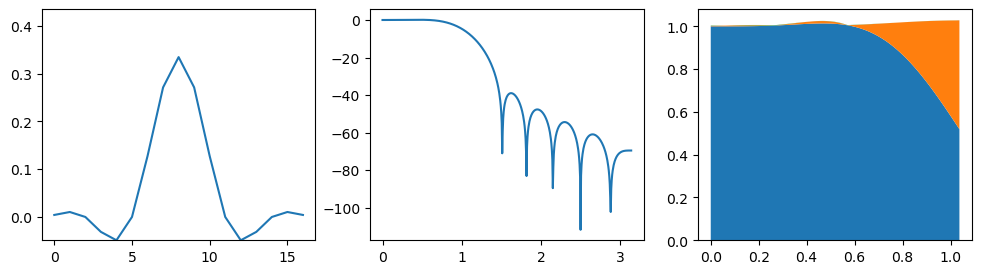

[[ 1.79158414e-05  4.39781459e-05 -1.88230852e-19 -1.32061720e-04
  -2.06346438e-04  1.03814962e-18  5.38732287e-04  1.14661385e-03
   1.41504695e-03  1.14661385e-03  5.38732287e-04 -2.10486797e-18
  -2.06346438e-04 -1.32061720e-04  6.38879040e-19  4.39781459e-05
   1.79158414e-05]
 [ 4.39781459e-05  1.07953474e-04 -4.62051639e-19 -3.24172862e-04
  -5.06520097e-04  2.54835340e-18  1.32243005e-03  2.81460134e-03
   3.47352601e-03  2.81460134e-03  1.32243005e-03 -5.16683468e-18
  -5.06520097e-04 -3.24172862e-04  1.56826101e-18  1.07953474e-04
   4.39781459e-05]
 [-1.88230852e-19 -4.62051639e-19  1.97762712e-33  1.38749219e-18
   2.16795655e-18 -1.09072068e-32 -5.66013258e-18 -1.20467746e-17
  -1.48670379e-17 -1.20467746e-17 -5.66013258e-18  2.21145680e-32
   2.16795655e-18  1.38749219e-18 -6.71231362e-33 -4.62051639e-19
  -1.88230852e-19]
 [-1.32061720e-04 -3.24172862e-04  1.38749219e-18  9.73456813e-04
   1.52102627e-03 -7.65243569e-18 -3.97111756e-03 -8.45195008e-03
  -1.04306312e-02 -

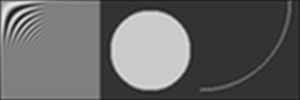

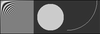

In [8]:
print('Box filter 2x')
freq_response_window(np.ones(2), 2)

print('Box filter 3x')
freq_response_window(np.ones(3), 3)

def lanczos_filter(a, c):
    step = 1.0 / c

    x = np.arange(-a + step, a-step*0.5, step)
    k = a * np.sin(x * np.pi) * np.sin(x * np.pi / a) / (x**2 * np.pi ** 2)

    k[x == 0.0] = 1.0

    return k

print('Lanczos 1x')
print('3')
freq_response_window(lanczos_filter(3, 1), 1)

print('Lanczos 2x')
print('1')
freq_response_window(lanczos_filter(1, 2), 2)
print('2')
freq_response_window(lanczos_filter(2, 2), 2)
print('3')
freq_response_window(lanczos_filter(3, 2), 2)
print('4')
freq_response_window(lanczos_filter(4, 2), 2)

print('Lanczos 3x')
print('1')
freq_response_window(lanczos_filter(1, 3), 3)
print('2')
freq_response_window(lanczos_filter(2, 3), 3)
print('3')
freq_response_window(lanczos_filter(3, 3), 3)